In [84]:
#Data Manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Supress numerical display in scientific notations 
pd.set_option('display.float_format', lambda x: '%.2f' %x)

#displat all columns of data frame
pd.set_option('display.max_columns', None)

In [8]:
df_foodhub = pd.read_csv('foodhub_order.csv')

In [10]:
df_foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## Data Overview

In [ ]:
# Exploring the data first...

In [60]:
df_foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## Observations: 
### The dataset consists of numerical and categorical values. 
### The rating column. consists of both string and numerical. We can check this later. 

In [62]:
print(f'The dataset contains {df_foodhub.shape[0]} rows and {df_foodhub.shape[1]} columns')

The dataset contains 1898 rows and 9 columns


In [64]:
df_foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [66]:
# Cast ratings to numerical values 

print(df_foodhub['rating'].value_counts(), '\n')

# change "Not given" to numerical value of 0 and convert to float to match other columns. 
df_foodhub['rating'] = df_foodhub['rating'].replace('Not given', 0).astype(np.float64)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64 



In [68]:
# Missing Value
df_foodhub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [70]:
df_foodhub1 = df_foodhub[df_foodhub['rating']>0]
df_foodhub.describe(include = 'all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1898.00,1898.00,1898,1898,1898.00,1898,1898.00,1898.00,1898.00
unique,NaN,NaN,178,14,NaN,2,NaN,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,NaN,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,NaN,NaN,NaN
mean,1477495.50,171168.48,NaN,NaN,16.50,NaN,2.66,27.37,24.16
std,548.05,113698.14,NaN,NaN,7.48,NaN,2.20,4.63,4.97
min,1476547.00,1311.00,NaN,NaN,4.47,NaN,0.00,20.00,15.00
25%,1477021.25,77787.75,NaN,NaN,12.08,NaN,0.00,23.00,20.00
50%,1477495.50,128600.00,NaN,NaN,14.14,NaN,4.00,27.00,25.00
75%,1477969.75,270525.00,NaN,NaN,22.30,NaN,5.00,31.00,28.00


In [128]:
# Print a statitical summart, nim, max, mean for food perpaation fime. 

def print_prep_time_stats(df):
    stats_summary = df_foodhub['food_preparation_time'].describe()
    min_time = df['food_preparation_time'].min()
    avg_time = round(df['food_preparation_time'].mean(), 2)
    max_time = df['food_preparation_time'].max()

In [130]:
print("Summary:" '\n', stats_summary, '\n')
print("Maximum:", max_time)
print("Minimum:",min_time)

NameError: name 'stats_summary' is not defined

In [132]:
print(print_prep_time_stats(df_foodhub))

None


# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [ ]:
# exploring the cost of the order, food preparation time, delivery time and provide their 
# distributions. (Histograms, boxplots, countsplots ets...)

C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


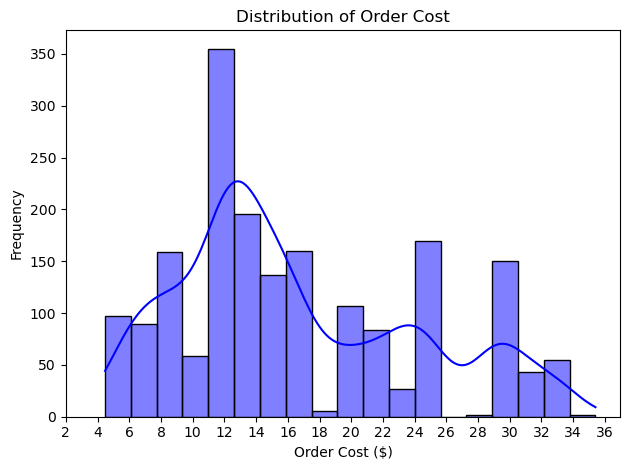

In [81]:
# Histogram
sns.histplot(x = df_foodhub['cost_of_the_order'], color = 'cornflowerblue')
plt.xlabel('Order Cost($)')
plt.ylabel('Frequency')
plt.xticks(np.arange(2,38,step = 2))
plt.tight_layout()
plt.show()


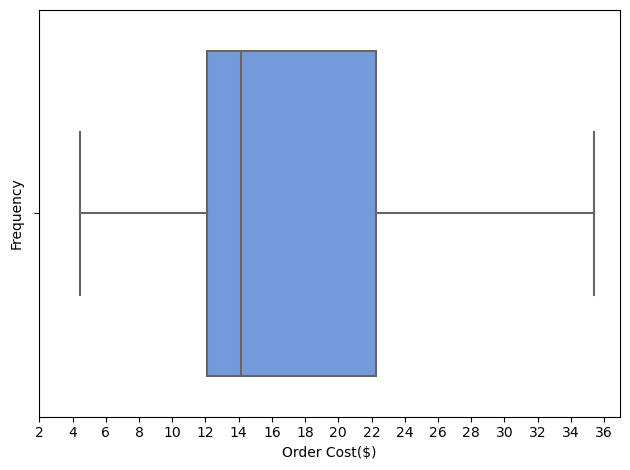

In [87]:
# Box Plot
sns.boxplot(x = df_foodhub['cost_of_the_order'], color = 'cornflowerblue')
plt.xlabel('Order Cost($)')
plt.ylabel('Frequency')
plt.xticks(np.arange(2,38,step = 2))
plt.tight_layout()
plt.show()


In [ ]:
# Histogram Plot
# The hist plot shows us a wide distribution of order cost 
# The datatset is slightly right-skewed, with most of the orders being in the lower end of the price
# ranging between 10 to 15 dollars. 


In [ ]:
# Box Plot 
# The whiskers on the boxplot conforims a wide distribution of the order cost 
# The distribution of order cost is right skewed with a median around 14 dollars 


In [ ]:
# The dots after the whiskers are outliers
# Can applt technique of taking them out. 

C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


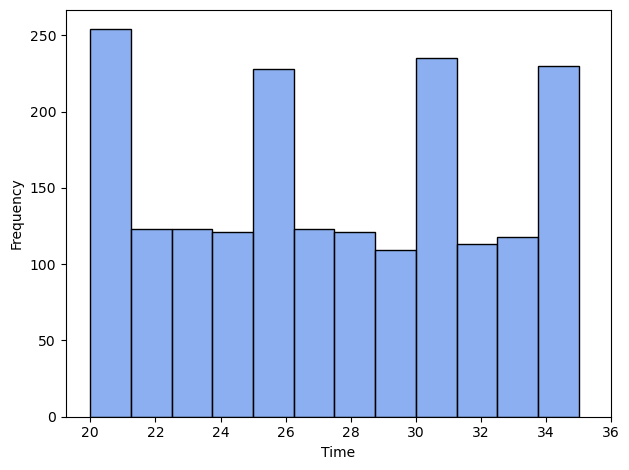

In [95]:
sns.histplot(x = df_foodhub['food_preparation_time'], color = 'cornflowerblue')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(np.arange(20,38,step = 2))
plt.tight_layout()
plt.show()

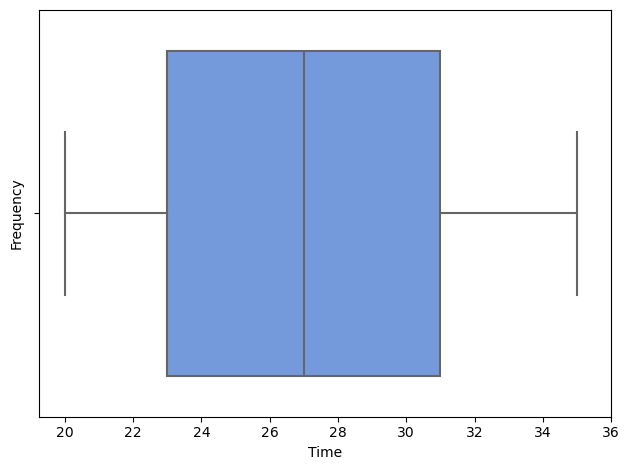

In [99]:
sns.boxplot(x = df_foodhub['food_preparation_time'], color = 'cornflowerblue')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(np.arange(20,38,step = 2))
plt.tight_layout()
plt.show()
# This is a uniform distribution

C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


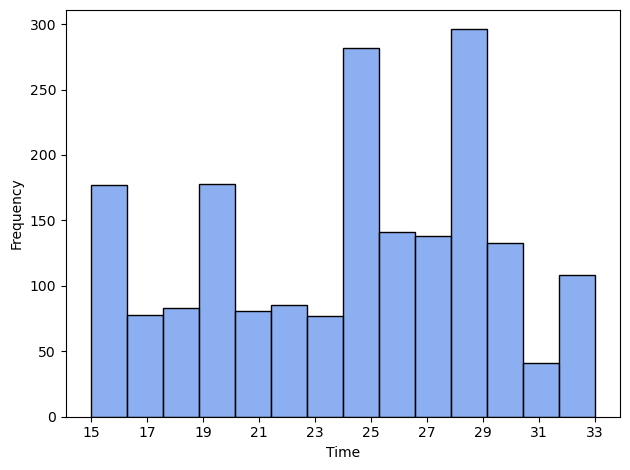

In [109]:
sns.histplot(x = df_foodhub['delivery_time'], color = 'cornflowerblue')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(np.arange(15,34,step = 2))
plt.tight_layout()
plt.show()

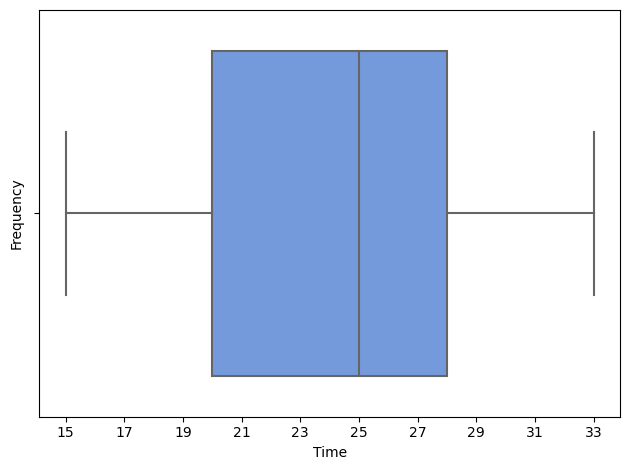

In [111]:
sns.boxplot(x = df_foodhub['delivery_time'], color = 'cornflowerblue')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(np.arange(15,34,step = 2))
plt.tight_layout()
plt.show()

## Restaurant Names

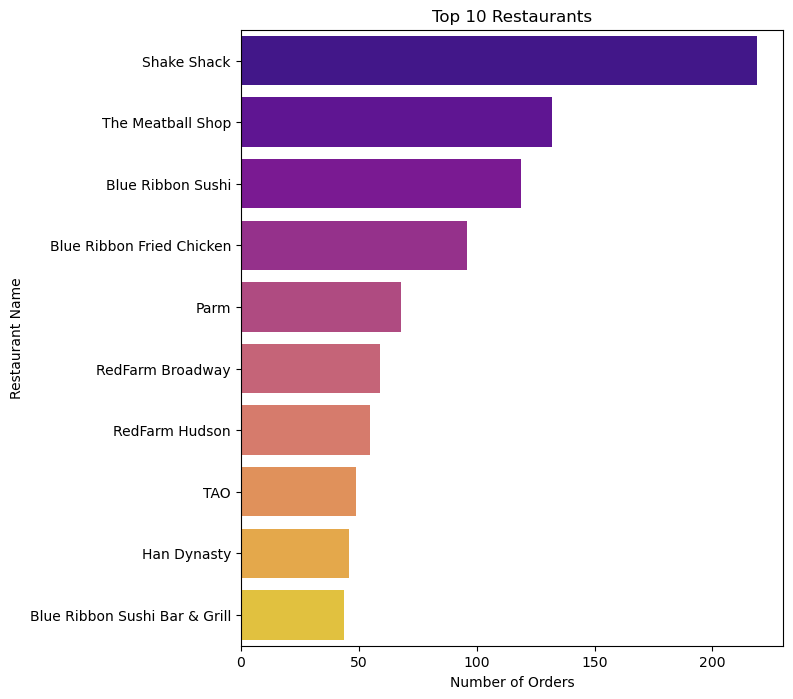

In [154]:
# Choose # of observations to plot 
N = 10

restaurant_counts = df_foodhub['restaurant_name'].value_counts().head(N)
plt.figure(figsize = (7, 8))
ax = sns.barplot(x = restaurant_counts.values, 
                 y = restaurant_counts.index, 
                 palette = 'plasma')
plt.title(f"Top {N} Restaurants")
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name') 
plt.show()

In [144]:
restaurant_counts.values

array([219, 132, 119,  96,  68], dtype=int64)

In [148]:
restaurant_counts.index

Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm'],
      dtype='object', name='restaurant_name')

In [ ]:
# Cuisine Type --> HW 

In [ ]:
# What is the most popular cuisine on weekends?

In [160]:
# How I tried to do it...
N = 1
weekends = df_foodhub[['day_of_the_week'] == 'Weekend']



In [164]:
# How professor did it 
df_foodhub[df_foodhub[['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

In [ ]:
# What percentage of the orders cost more than 20 dollars?

In [168]:
# How professor did it.. 
ttl_observations = len(df_foodhub)

ttl_greater_20 = len(df_foodhub[df_foodhub['cost_of_the_order'] > 20]) 

#pct_orders_greater_20 = (ttl_greater_20/ ttl_observations)*100

In [170]:
pct_orders_greater_20 = round((ttl_greater_20/ ttl_observations)*100, 2)

In [174]:
print(str(pct_orders_greater_20) + '%')

29.24%


In [172]:
pct_orders_greater_20

29.24

## Multivariables Analysis 

In [35]:
# Pairplot 
# Select numeric columns and drop unique identifiers not needed for analysis 

df_numeric_column = df_foodhub.select_dtypes(include = ['float', 'int']).drop(columns = ['order_id', 'customer_id'])

In [37]:
df_numeric_column

,cost_of_the_order,food_preparation_time,delivery_time
0,30.75,25,20
1,12.08,25,23
2,12.23,23,28
3,29.20,25,15
4,11.59,25,24
...,...,...,...
1893,22.31,31,17
1894,12.18,31,19
1895,25.22,31,24
1896,12.18,23,31


C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\draco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

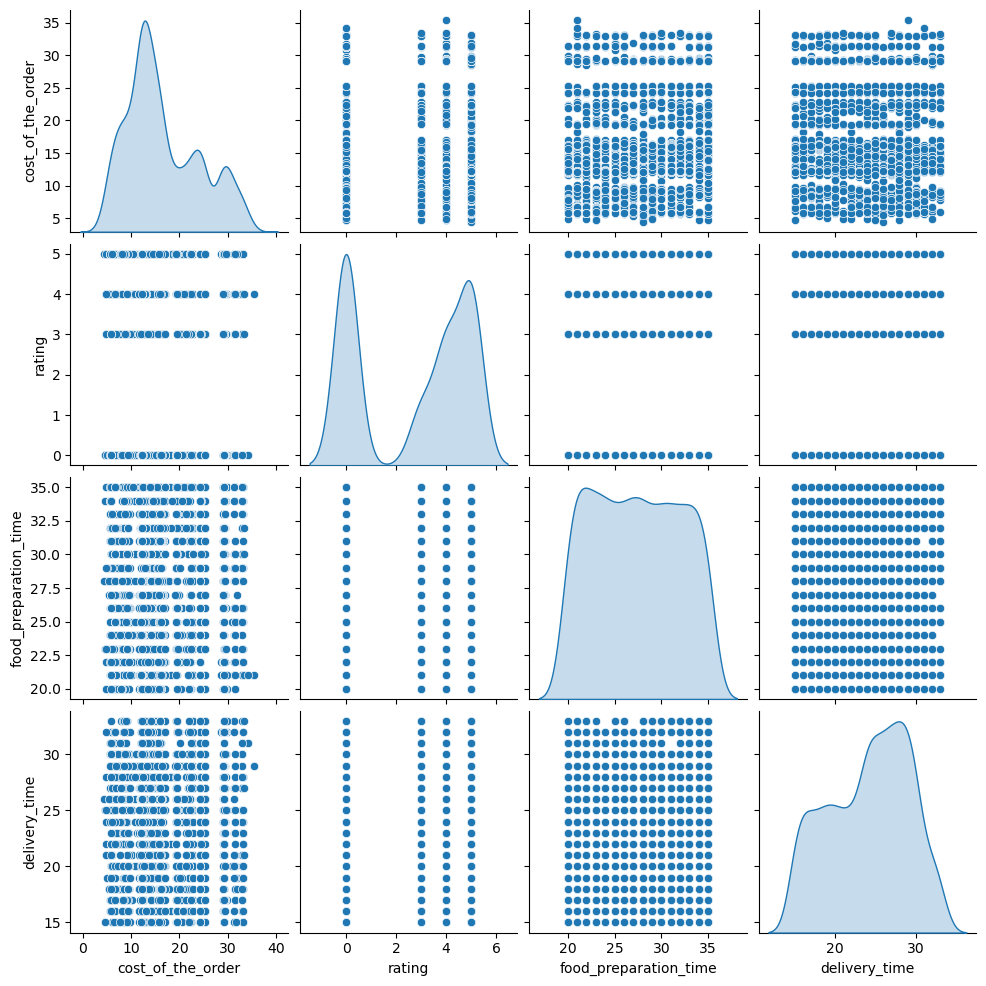

In [187]:
sns.pairplot(df_foodhub, vars = df_numeric_column, 
             diag_kind = 'kde')
# Exploring distribution of data

## Correlation Heat Map

In [192]:
df_numeric_column = df_foodhub.select_dtypes(include = ['float', 'int']).drop(columns = ['order_id', 'customer_id'])

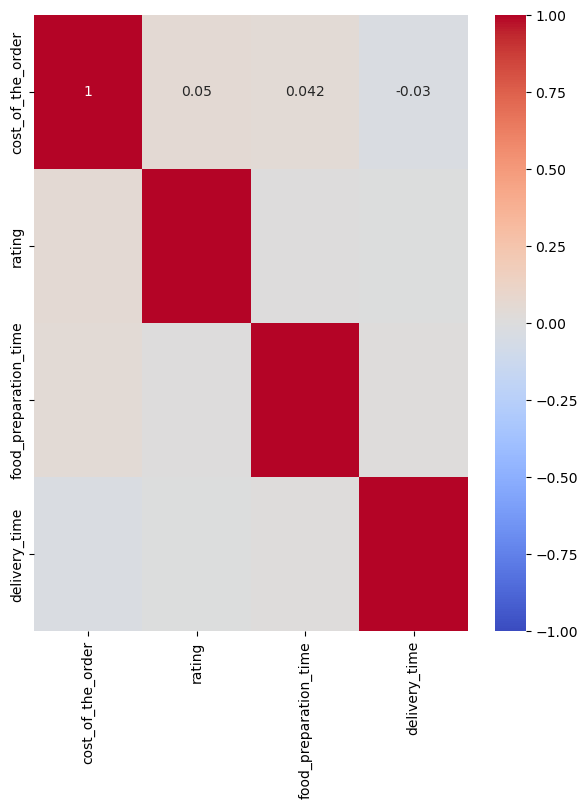

In [212]:
plt.figure(figsize = (7,8))
plt.tight_layout()
sns.heatmap(df_numeric_column.corr(),
           annot = True,
           vmin = -1,
           vmax = 1,
           cmap='coolwarm')
plt.show()

In [194]:
df_numeric_column.corr()

,cost_of_the_order,rating,food_preparation_time,delivery_time
cost_of_the_order,1.00,0.05,0.04,-0.03
rating,0.05,1.00,0.00,-0.00
food_preparation_time,0.04,0.00,1.00,0.01
delivery_time,-0.03,-0.00,0.01,1.00


In [214]:
sns.__version__

'0.12.2'

## Cuisine Cost Distribution Cont...

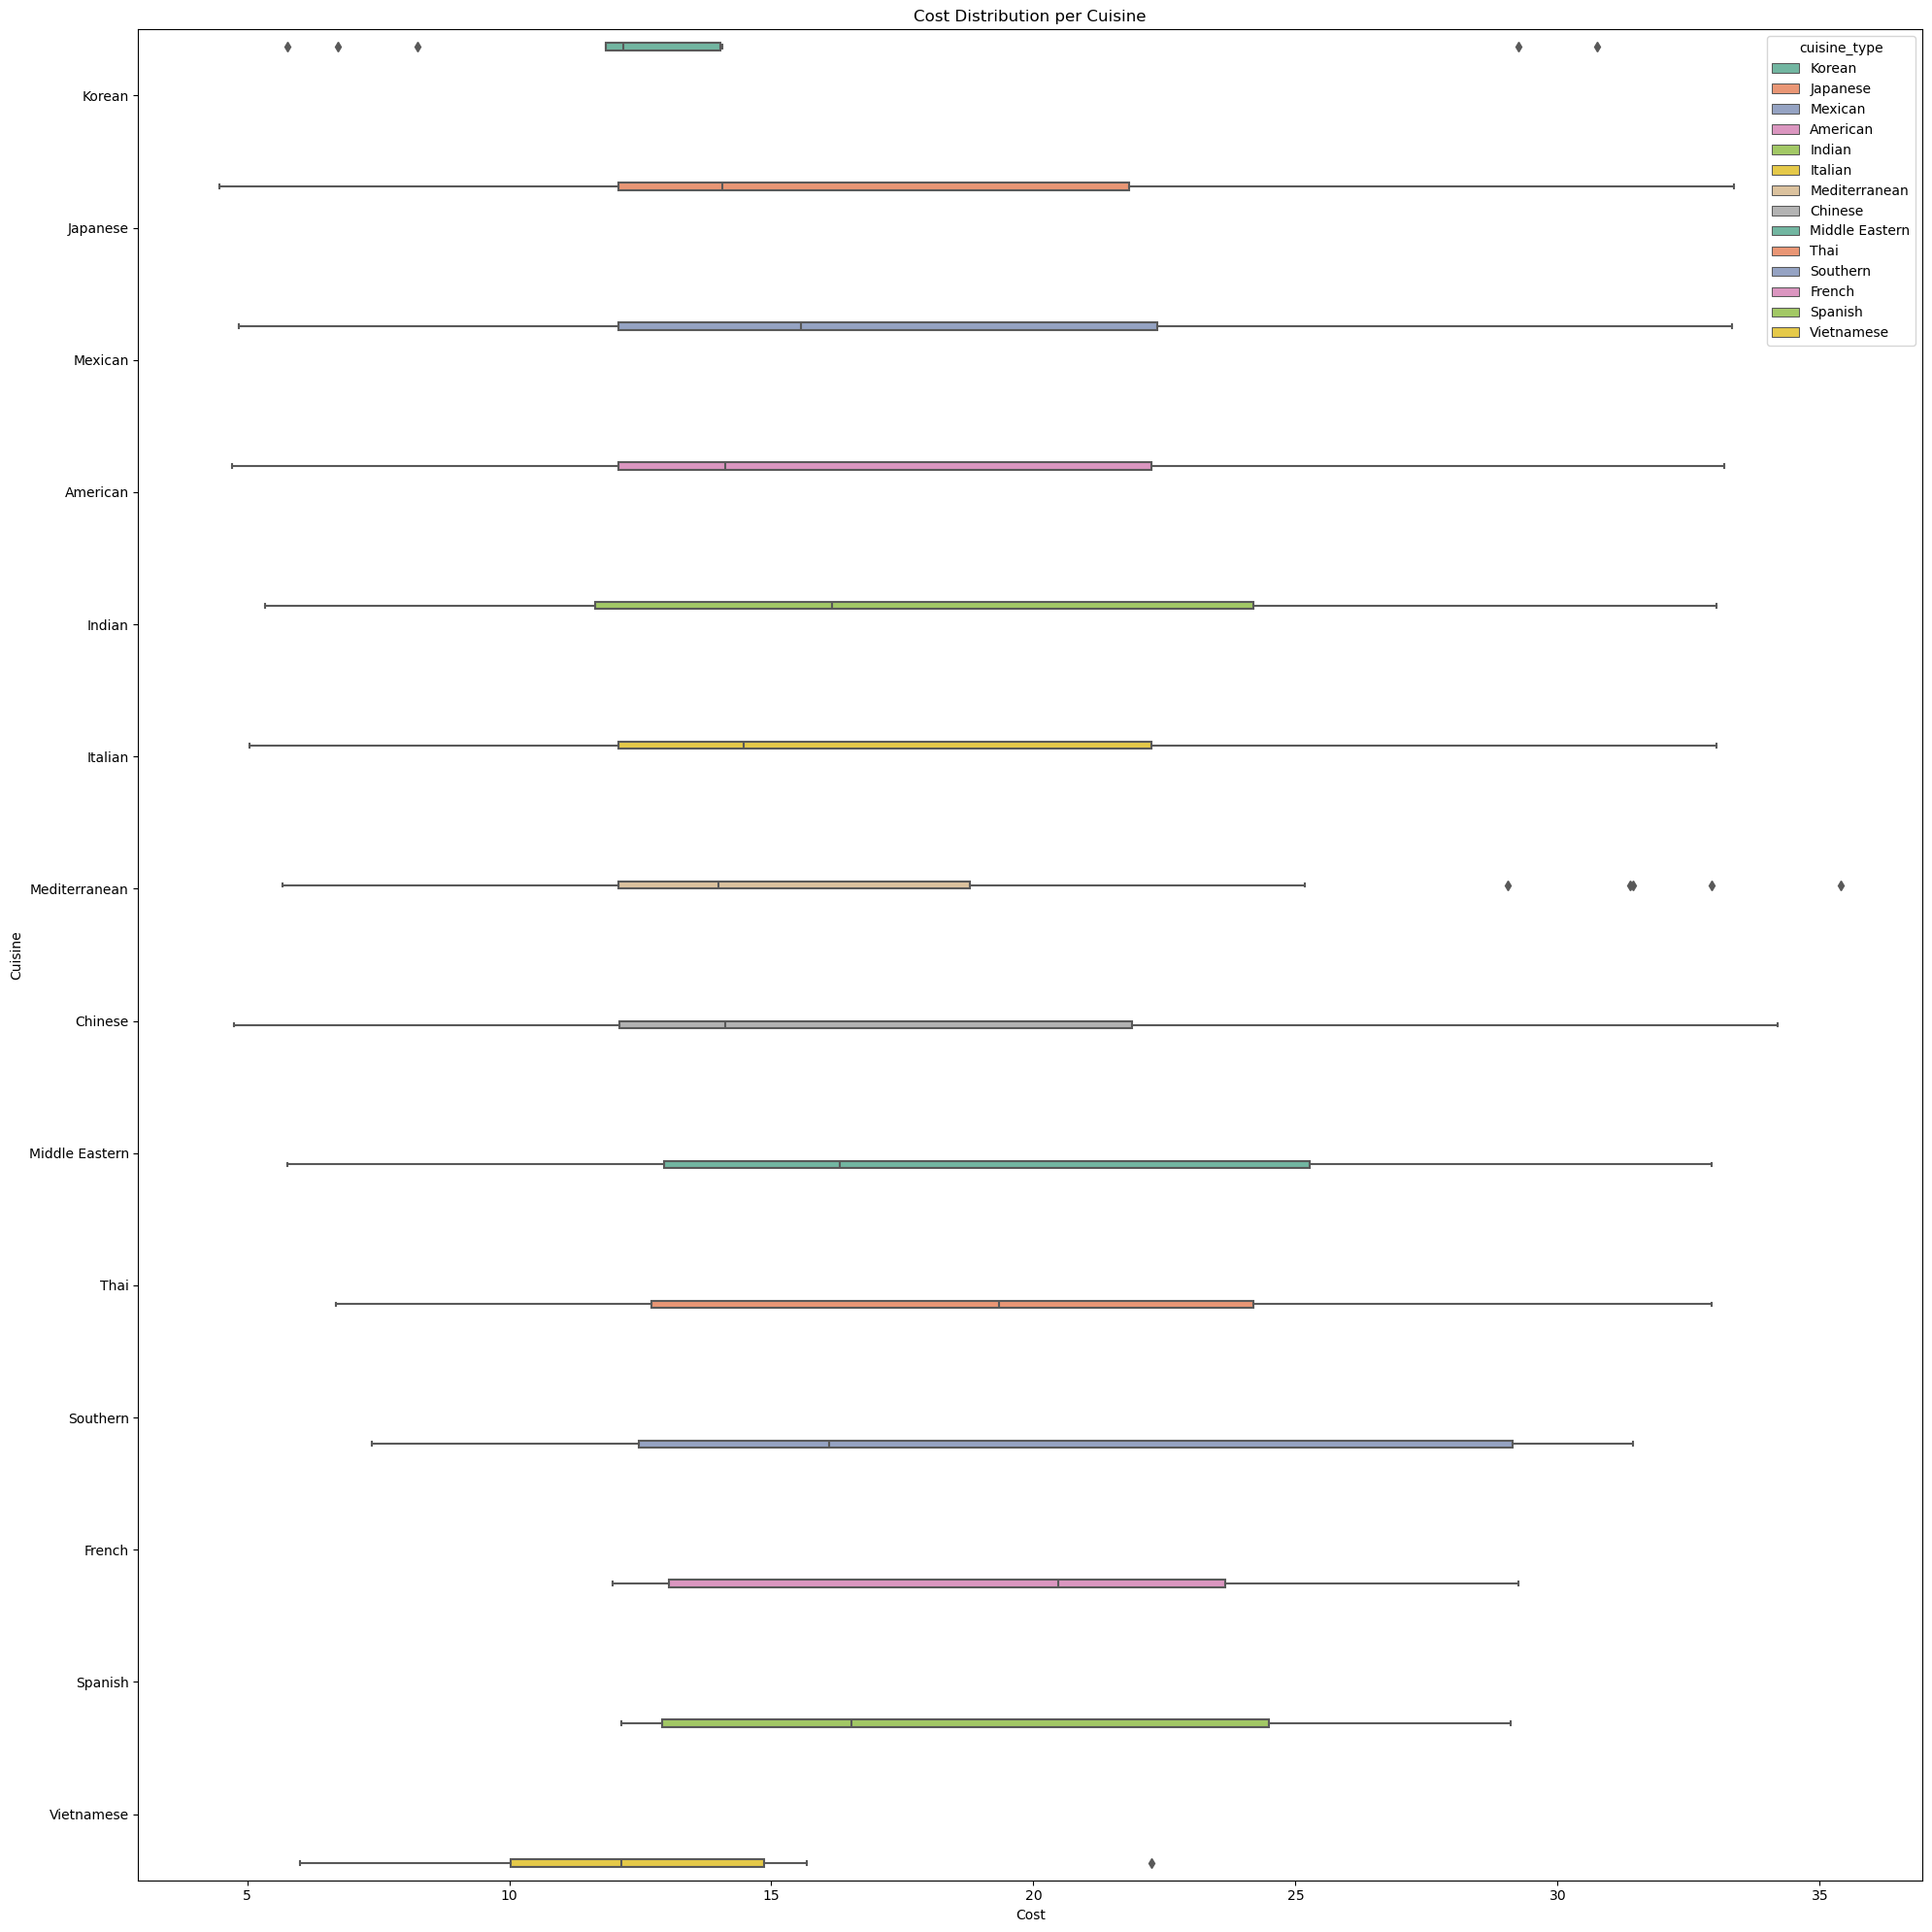

In [16]:
#Create a boxplot for each cuisine type  to analyze the cost distribuition

plt.figure(figsize = (20,20))
sns.boxplot(x = "cost_of_the_order",
            y = "cuisine_type",
            data = df_foodhub,
            hue = "cuisine_type",
            palette = "Set2")
plt.title("Cost Distribution per Cuisine")
plt.xlabel("Cost")
plt.ylabel("Cuisine")
plt.tight_layout()
# to be able to see everything
plt.show()

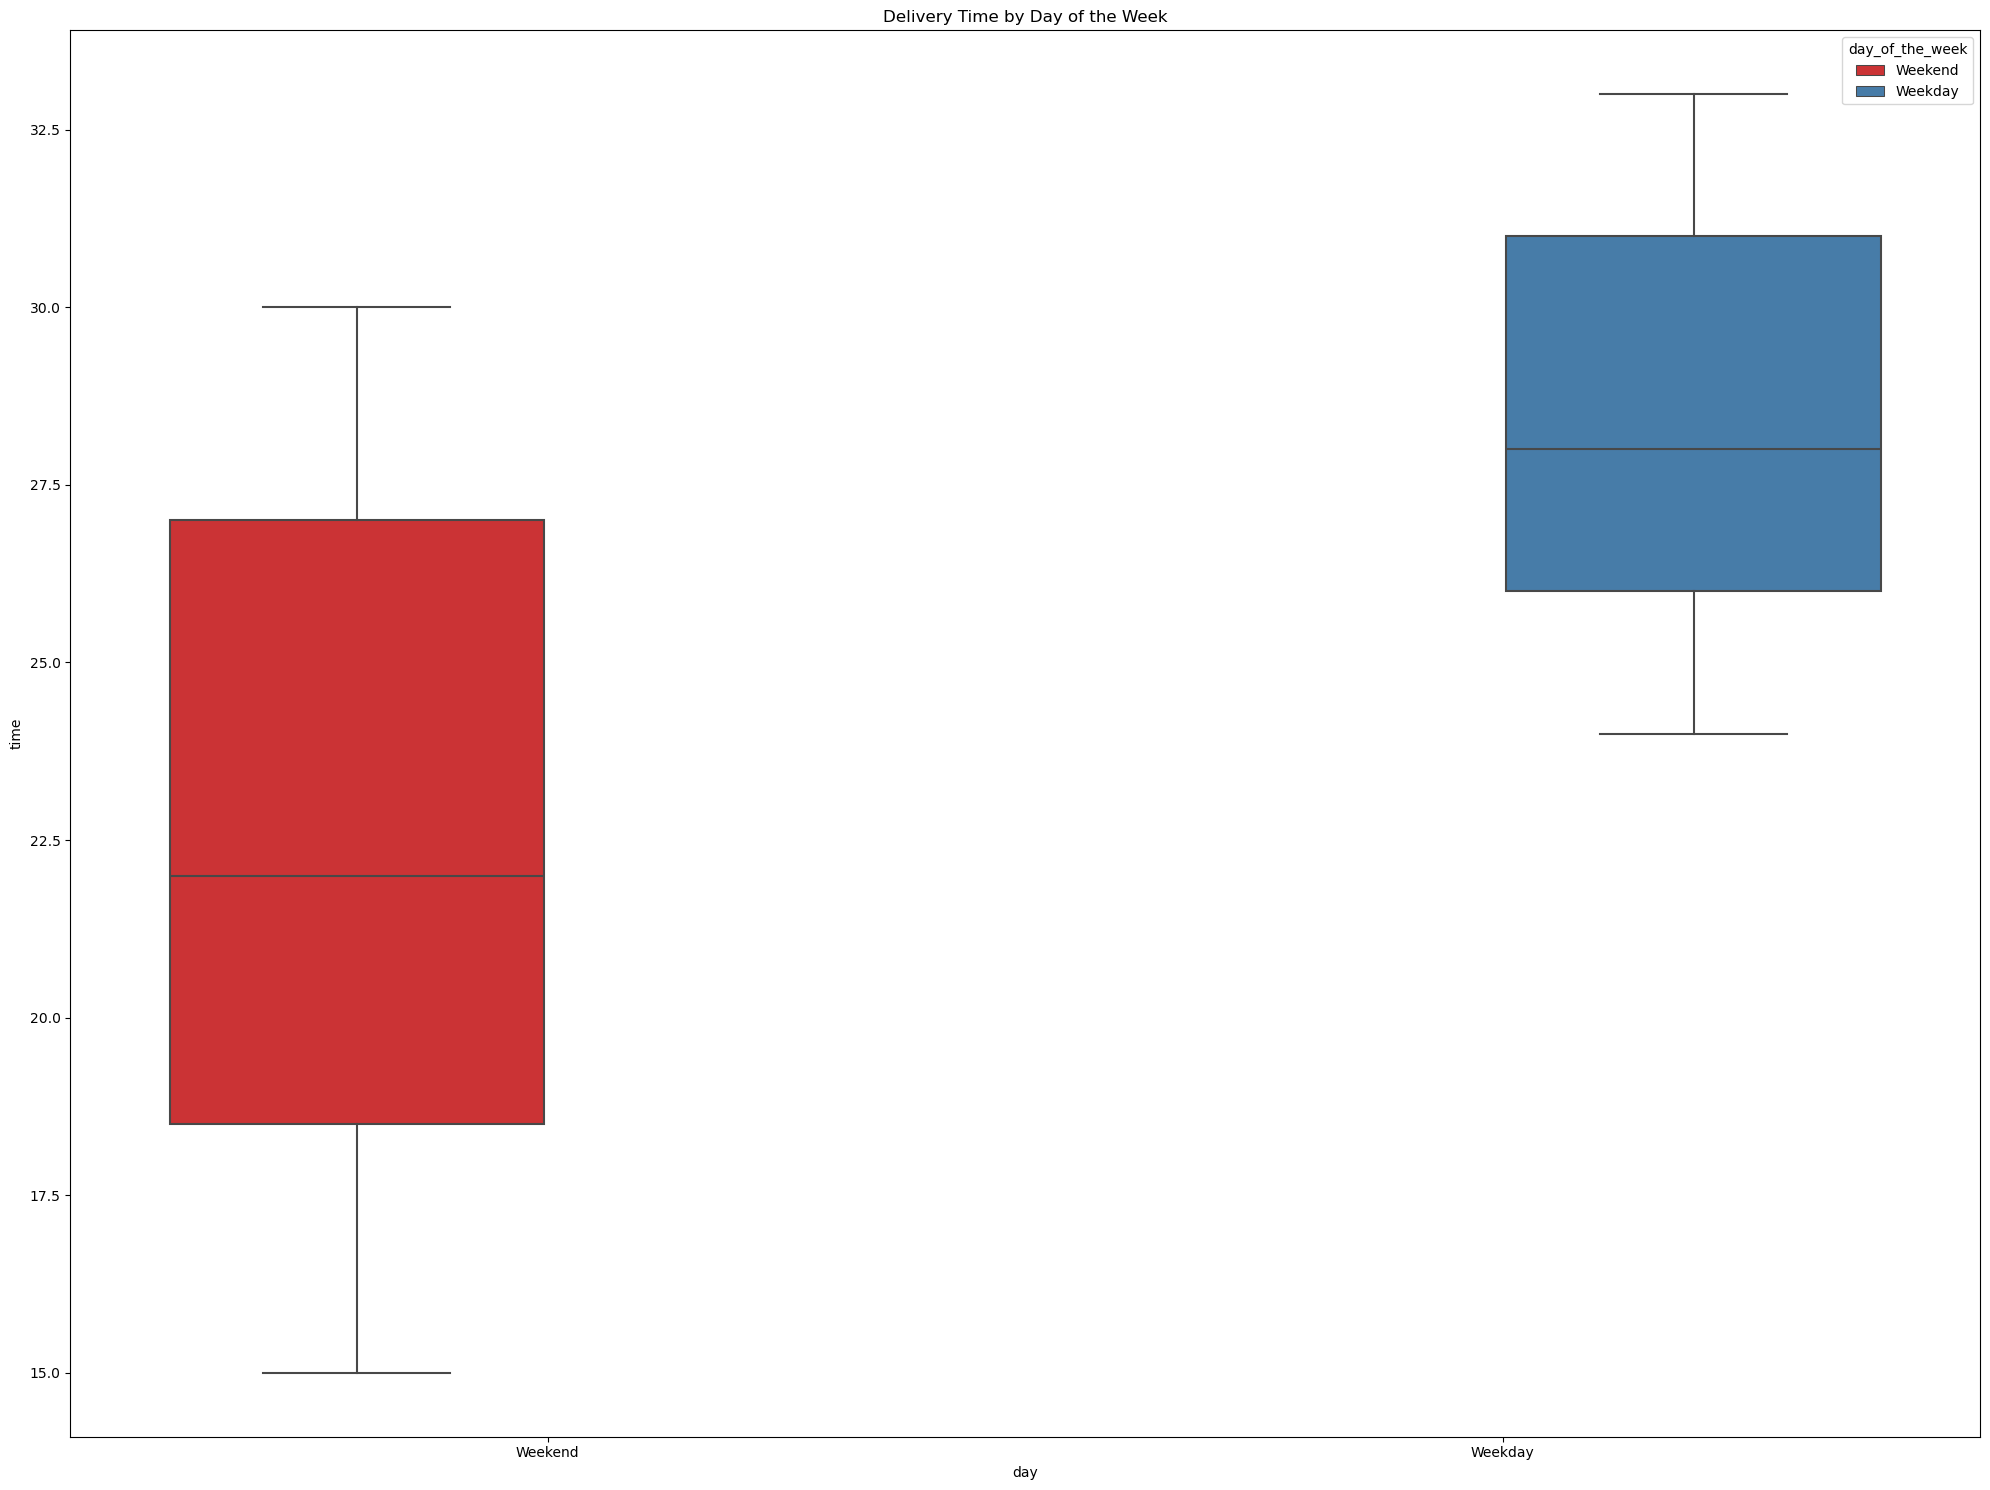

In [22]:
# Boxplots with delivery time:
plt.figure(figsize = (20,15))
sns.boxplot(x = "day_of_the_week",
            y = "delivery_time",
            data = df_foodhub,
            hue = "day_of_the_week",
            palette = "Set1")
plt.title("Delivery Time by Day of the Week")
plt.xlabel("day")
plt.ylabel("time")
plt.tight_layout()
# to be able to see everything
plt.show()


### Question: The Company wants to provide a promotional offer in the advertisement of the restaurants. The condition 
### to get the offer is that the resaturants must have a rating counting of more than 50 and the avg rate should be greater than 4.Find the resutaurants
### that are eliglible for this promotional offer. 

In [39]:
df_foodhub

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [70]:
# How the professor did it:
df_foodhub_filtered = df_foodhub[df_foodhub['rating']!= Not given]

# group by the restaurant name:
df_foodhub_gouped = df_foodhub_filtered.groupby("restaurant_name").agg(
    mean_rating = ('rating', 'mean'), 
    rating_count = ('rating', 'count') 
).reset_index()

df_foodhub_promo_qualified = df_foodhub_grouped[(df_foodhub_grouped['mean_rating'] > 4) & (df_foodhub_grouped['rating'] > 50)] 

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3446746072.py, line 2)

In [64]:
df_foodhub_filtered

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


### Q2: The compnay charges the restaurants 25% on the orders having cost greater tan 20 dollars and 15% on 
### on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [88]:
from numpy import *

In [92]:
# how professor did it:
def calculate_revenue(cost):
    return np.where( cost > 20, cost*.25,
            np.where((cost > 5) & (cost <= 20), cost * 0.15, 0 ) ) 
df_foodhub['revenue'] = calculate_revenue(df_foodhub['cost_of_the_order'].values)

### df_foodhub.sample(10)
net_revenue = df_foodhub['revenue'].sum()

In [94]:
net_revenue

6166.303

### Q3: The company wants to analyze the total time required to deliver the food.What percentage of orders take more than 
### 60 minutes to get delivered from the time the order is placed?(Food has to be preparade and then delivered).

In [ ]:
# How Im doing it:
def total_time_required(delivery_time):
    return np.

In [107]:
# How professor did it: 
def calculate_percentage_over_60(df): 
    ttl_deliveries_60 = len(df[(df['food_preparation_time'] + df['delivery_time']) > 60])
    ttl_orders = len(df)
    pct_60 = round((ttl_deliveries_60/ ttl_orders)* 100, 2)
    
    return pct_60
calculate_percentage_over_60(df_foodhub)

10.54

### Q4:The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [110]:
df_foodhub

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.58
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.83
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.30
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.83


In [112]:
df_foodhub.groupby('delivery_time').mean()

TypeError: agg function failed [how->mean,dtype->object]